In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms.v2 as v2
from torch.utils.data import random_split, DataLoader
from torchvision.models import resnet50
from torchvision import transforms
import torch.nn as nn
from torch.optim import Adam
import time
from tqdm import tqdm

In [3]:
##이미지 확인
from pathlib import Path
import torch
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'

from torchvision.transforms import v2
from torchvision.io import read_image

torch.manual_seed(1)

# If you're trying to run that on collab, you can download the assets and the
# helpers from https://github.com/pytorch/vision/tree/main/gallery/
from helpers import plot
img = read_image('rose_v1/bud/07_20201028_567302.jpg')
print(f"{type(img) = }, {img.dtype = }, {img.shape = }")


type(img) = <class 'torch.Tensor'>, img.dtype = torch.uint8, img.shape = torch.Size([3, 1960, 4032])


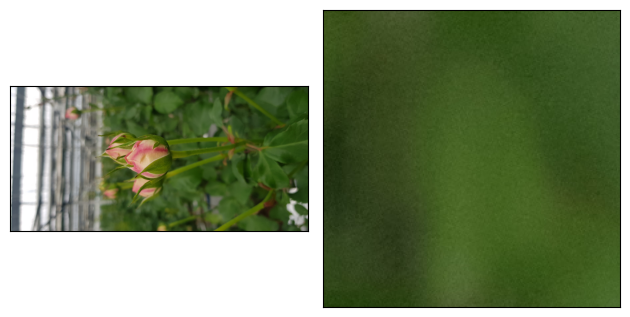

In [4]:
transform = v2.RandomCrop(size=(224, 224))
out = transform(img)

plot([img, out])

In [8]:
import os
import json
from PIL import Image
import torchvision.transforms as transforms
import torchvision

crop_path='./rose/rose_img_crop'
# JSON 파일에서 bbox 데이터를 사용하여 이미지를 크롭하는 함수
def crop_images(json_file_path, image_file_path):
    # JSON 파일 로드
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    
    # 이미지 파일 열기
    img = Image.open(image_file_path)
    
    # 변환할 때 사용할 크롭 및 변환 작업 정의
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    
    # bbox 데이터 가져오기
    annotations = data['annotations']
    imgs = data['images']

    width = int(imgs[0]['width'])
    height = int(imgs[0]['height'])
    # bbox를 사용하여 이미지 크롭
    cropped_images = []
    for annotation in annotations:
        bbox = annotation['bbox']
        # width = imgs['width']

        # high =
        # bbox = bbox.split(',')  # bbox 데이터를 쉼표로 분할하여 좌표 추출
        # bbox = list(map(float, bbox))  # 좌표를 실수형으로 변환
        # bbox = [int(coord) for coord in bbox]  # bbox 좌표를 정수형으로 변환
        # x1,x2,y2,y1
        # bbox = x,y,w,h
        print(bbox)
        cropped_img = img.crop((bbox[1], bbox[0], bbox[1]+ bbox[3], bbox[0]+bbox[1]))

        cropped_img = transform(cropped_img)  # Torch 텐서로 변환
        cropped_images.append(cropped_img)
        torchvision.utils.save_image(cropped_img, str(imgs[0]['fname']))
    
    return cropped_images

# 폴더 경로
folder_path = "./rose"

# 폴더 내의 모든 이미지 파일 및 JSON 파일 목록 가져오기
image_files = []
json_files = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith((".jpg", ".jpeg", ".png")):
            image_files.append(os.path.join(root, file))
        elif file.endswith(".json"):
            json_files.append(os.path.join(root, file))

# 이미지 파일과 JSON 파일 이름으로 매칭하여 처리
for image_file_path in image_files:
    # 이미지 파일 이름에서 확장자를 제외한 부분 가져오기
    image_name = os.path.splitext(os.path.basename(image_file_path))[0]
    
    # 해당 이미지 파일과 매칭되는 JSON 파일 찾기
    matching_json_files = [json_file for json_file in json_files if os.path.splitext(os.path.basename(json_file))[0] == image_name]
    
    # 매칭되는 JSON 파일이 있을 경우에만 처리
    if matching_json_files:
        json_file_path = matching_json_files[0]  # 첫 번째 매칭되는 JSON 파일 선택
        
        # 함수 호출하여 이미지 크롭
        cropped_images = crop_images(json_file_path, image_file_path)
        
        # 결과 출력
        print(f"매칭되는 이미지 및 JSON 파일: {os.path.basename(image_file_path)}, {os.path.basename(json_file_path)}")
        print(f"크롭된 이미지 수: {len(cropped_images)}")
    else:
        print(f"매칭되는 JSON 파일이 없습니다: {os.path.basename(image_file_path)}")


[318.64, 1287.76, 992.84, 908.95]
매칭되는 이미지 및 JSON 파일: 07_20201028_567302.jpg, 07_20201028_567302.json
크롭된 이미지 수: 1
[376.12, 1160.16, 960.78, 948.85]
매칭되는 이미지 및 JSON 파일: 07_20201028_567303.jpg, 07_20201028_567303.json
크롭된 이미지 수: 1
[400.35, 1341.43, 1338.06, 1206.27]
매칭되는 이미지 및 JSON 파일: 07_20201028_567304.jpg, 07_20201028_567304.json
크롭된 이미지 수: 1
[579.74, 696.74, 940.53, 1280.95]
매칭되는 이미지 및 JSON 파일: 07_20201028_567305.jpg, 07_20201028_567305.json
크롭된 이미지 수: 1
[283.78, 1155.96, 1233.58, 1389.85]
매칭되는 이미지 및 JSON 파일: 07_20201028_567306.jpg, 07_20201028_567306.json
크롭된 이미지 수: 1
[8.79, 1054.7, 1507.38, 1275.7]
매칭되는 이미지 및 JSON 파일: 07_20201028_567307.jpg, 07_20201028_567307.json
크롭된 이미지 수: 1
[192.83, 1381.79, 1343.13, 1208.55]
매칭되는 이미지 및 JSON 파일: 07_20201028_567311.jpg, 07_20201028_567311.json
크롭된 이미지 수: 1
[636.33, 479.76, 784.5, 1091.65]
매칭되는 이미지 및 JSON 파일: 07_20201028_567313.jpg, 07_20201028_567313.json
크롭된 이미지 수: 1
[1569.28, 3573.47, 268.96, 448.67]
[1124.8, 2220.91, 180.63, 1066.35]
[703.12

ValueError: cannot write empty image as JPEG

In [5]:
# 데이터 로딩
test_transforms = v2.Compose([
    v2.Resize((224, 224)),
    v2.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = ImageFolder('./rose_v1', transform=test_transforms)

dataset_train, dataset_test = random_split(dataset, [400, 100])

dataloader_train = DataLoader(dataset_train, batch_size=16,shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=16)

c:\Users\user\anaconda3\envs\py3_11\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


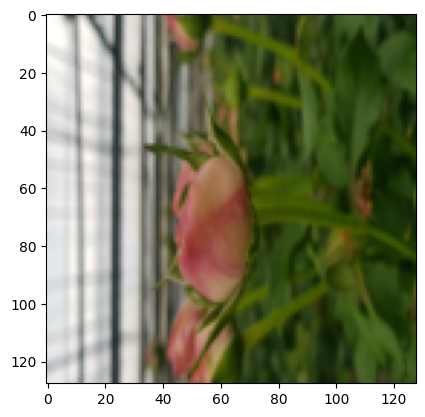

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# 경로 설정
image_path = './rose_v1/bud/07_20201028_567307.jpg'

# 이미지 열기
img = Image.open(image_path)

# 변환 적용
test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# 변환된 이미지 확인
transformed_img = test_transforms(img)

# PIL 이미지로 변환하여 출력하기 위해 다시 변환
img_show = transforms.ToPILImage()(transformed_img)

# 이미지 출력
plt.imshow(img_show)
plt.show()

In [ ]:
# 변환 정의
test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# 데이터셋 로드
dataset = ImageFolder('./rose_v1', transform=test_transforms)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# 데이터 로드 확인
for images, labels in data_loader:
    print(images.size(), labels.size())

In [ ]:
# 모델 정의
model = resnet50(weights="IMAGENET1K_V2")
for p in model.parameters():
    p.requires_grad = False

model.fc = nn.Sequential(
    nn.Dropout(p=0.5),  # 드롭아웃 적용
    nn.Linear(2048, 64),
    nn.ReLU(),
    nn.Linear(64, 3)## 모델 타겟값 설정 
)

In [ ]:
##gpu사용
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
# 옵티마이저 및 손실 함수 정의
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # 가중치 감쇠 적용
criterion = nn.CrossEntropyLoss()

dataloader_dict = {
    'train': dataloader_train,
    'val': dataloader_test
}

In [ ]:
# 학습 함수 정의
def train_model(model, dataloader_dict, criterion, optimizer, num_epoch):    
    since = time.time()
    best_acc = 0.0
   
    for epoch in range(num_epoch):
        print('Epoch {}/{}'.format(epoch + 1, num_epoch))
        print('-'*20)
       
        for phase in ['train', 'val']:          
            if phase == 'train':
                model.train()
            else:
                model.eval()
               
            epoch_loss = 0.0
            epoch_corrects = 0
           
            for inputs, labels in tqdm(dataloader_dict[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
               
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                   
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                       
                    epoch_loss += loss.item() * inputs.size(0)
                    epoch_corrects += torch.sum(preds == labels.data)
                   
            epoch_loss = epoch_loss / len(dataloader_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloader_dict[phase].dataset)
           
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
           
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
               
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    return model

In [ ]:
# 학습 실행
EPOCHES = 3
train_model(model, dataloader_dict, criterion, optimizer, EPOCHES)